In [40]:
# Libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
import numpy as np


In [41]:
nltk.download('stopwords')
nltk.download('all')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!

True

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
data1 = '/content/drive/MyDrive/NLP Project/IMDB Dataset.csv'
get_data = pd.read_csv(filepath_or_buffer=data1)
df =  pd.DataFrame(get_data)
reviews =df["review"] # pre-process on this column

Text(0.5, 1.0, 'Break-down of sentiments')

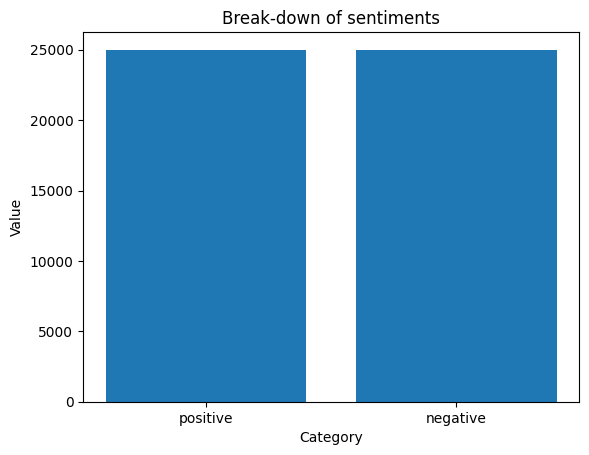

In [44]:
#plotting bar and pie chart of the data

# Data to plot
from matplotlib import pyplot as plt
pos_reviews = len(df[df['sentiment']=="positive"])
negative_review = len(df[df['sentiment']=="negative"])


sentiments_filtered = [pos_reviews,negative_review]
categories = ['positive','negative']

# Create a bar chart
plt.bar(categories, sentiments_filtered)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Break-down of sentiments')




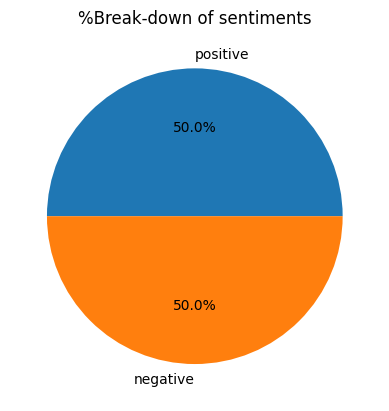

In [45]:
# Show the chart
plt.show()

# Create a pie chart
plt.pie(sentiments_filtered, labels=categories, autopct="%1.1f%%")

# Add a title
plt.title('%Break-down of sentiments')

# Show the chart
plt.show()


In [46]:
reviews = [word_tokenize(i) for i in reviews] #tokenizing sentences

In [47]:
mystopwords = set(stopwords.words('english')+['``',"''",'.',"!",",",'<','br','/','>','<','','/','>']) #set of stop words

In [48]:
#removing stop words.
temp1= []
for i in reviews:
  temp2 =[]
  for k in i:
    if k not in mystopwords:
      temp2.append(k)
  temp1.append(temp2)

reviews = temp1

In [49]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [50]:
#lemmatizing
temp1= []
for i in reviews:
  temp2 =[]
  for k in i:
    lemmatizer.lemmatize(k)
    temp2.append(k)
  temp1.append(temp2)

reviews  = temp1

In [51]:
df['review'] = reviews

In [52]:
df

,review,sentiment
0,"[One, reviewers, mentioned, watching, 1, Oz, e...",positive
1,"[A, wonderful, little, production, The, filmin...",positive
2,"[I, thought, wonderful, way, spend, time, hot,...",positive
3,"[Basically, 's, family, little, boy, (, Jake, ...",negative
4,"[Petter, Mattei, 's, Love, Time, Money, visual...",positive
...,...,...
49995,"[I, thought, movie, right, good, job, It, n't,...",positive
49996,"[Bad, plot, bad, dialogue, bad, acting, idioti...",negative
49997,"[I, Catholic, taught, parochial, elementary, s...",negative
49998,"[I, 'm, going, disagree, previous, comment, si...",negative


In [53]:
#make df['review'] every record from list to string
for i in range(0,len(df['review'])):
  temp = ' '.join(df['review'][i])
  df['review'][i] = temp


In [54]:
df

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought wonderful way spend time hot summer ...,positive
3,Basically 's family little boy ( Jake ) thinks...,negative
4,Petter Mattei 's Love Time Money visually stun...,positive
...,...,...
49995,I thought movie right good job It n't creative...,positive
49996,Bad plot bad dialogue bad acting idiotic direc...,negative
49997,I Catholic taught parochial elementary schools...,negative
49998,I 'm going disagree previous comment side Malt...,negative


SentimentIntensityAnalyzer is a rule-based sentiment analysis tool that uses a combination of lexicons and rules to assess the sentiment of text. It is specifically attuned to sentiments expressed in social media, and works well on texts from other domains as well.


In [55]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [56]:
Predicted_sentiment =[]
for i in range(0,len(df['review'])):
  score = SentimentIntensityAnalyzer().polarity_scores(df['review'][i])
  neg = score['neg']
  pos = score['pos']
  if neg > pos:
    Predicted_sentiment.append("negative")
  elif pos > neg:
    Predicted_sentiment.append("positive")
  else:
    Predicted_sentiment.append("neutral")


In [57]:
df['Predicted_sentiment'] = Predicted_sentiment

In [58]:
df

,review,sentiment,Predicted_sentiment
0,One reviewers mentioned watching 1 Oz episode ...,positive,negative
1,A wonderful little production The filming tech...,positive,positive
2,I thought wonderful way spend time hot summer ...,positive,positive
3,Basically 's family little boy ( Jake ) thinks...,negative,negative
4,Petter Mattei 's Love Time Money visually stun...,positive,positive
...,...,...,...
49995,I thought movie right good job It n't creative...,positive,positive
49996,Bad plot bad dialogue bad acting idiotic direc...,negative,negative
49997,I Catholic taught parochial elementary schools...,negative,negative
49998,I 'm going disagree previous comment side Malt...,negative,negative


In [59]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
pred_neut_act_pos = 0
pred_neut_act_neg = 0
for i in range(0,len(df['sentiment'])):
  if df['sentiment'][i]=='positive' and df['Predicted_sentiment'][i]=='positive':
    true_positive+=1
  elif df['sentiment'][i]=='negative' and df['Predicted_sentiment'][i]=='negative':
    true_negative +=1
  elif df['sentiment'][i]=='negative' and df['Predicted_sentiment'][i]=='positive':
    false_positive +=1
  elif df['sentiment'][i]=='positive' and df['Predicted_sentiment'][i]=='negative':
    false_negative +=1
  elif df['sentiment'][i]=='negative' and df['Predicted_sentiment'][i]=='neutral':
    pred_neut_act_neg +=1
  elif df['sentiment'][i]=='positive' and df['Predicted_sentiment'][i]=='neutral':
    pred_neut_act_pos +=1

In [60]:
conf_mat_format = pd.DataFrame({'Actual Positive':['TP','FN','FNEUT.'],'Actual Negative':['FP','TN','FNEUT.'],'Actual Neutral':['FP','FN','TNEUT.']})

In [61]:
conf_mat_format

,Actual Positive,Actual Negative,Actual Neutral
0,TP,FP,FP
1,FN,TN,FN
2,FNEUT.,FNEUT.,TNEUT.


In [62]:
labels = ["Predicted Positive",'Predictive Negative','Predicted Neutral']
col1 = labels
col2 = [true_positive,false_positive,pred_neut_act_pos]
col3 = [true_negative,false_negative,pred_neut_act_neg]
conf_mat = pd.DataFrame({'Predicitions':labels,'Actual Positive':col2,'Actual Negative':col3,'Actual Neutral':[0,0,0]})
conf_mat

,Predicitions,Actual Positive,Actual Negative,Actual Neutral
0,Predicted Positive,21726,11926,0
1,Predictive Negative,12997,3221,0
2,Predicted Neutral,53,77,0


In [63]:
import pandas as pd
# Calculate accuracy for positive class
accuracy_p = (conf_mat.loc[0][1] + conf_mat.loc[1][2] +conf_mat.loc[2][3]) / (conf_mat.loc[0][1] + conf_mat.loc[0][2] +conf_mat.loc[0][3] + conf_mat.loc[1][1] + conf_mat.loc[1][2] +conf_mat.loc[1][3]+ conf_mat.loc[2][1] + conf_mat.loc[2][2] +conf_mat.loc[2][3])

# Calculate precision for positive sentiment class
precision_p = conf_mat.loc[0][1] / (conf_mat.loc[0][1] + conf_mat.loc[0][2] + conf_mat.loc[0][3])

# Calculate recall positive sentiment class
recall_p = conf_mat.loc[0][1] / (conf_mat.loc[0][1] + conf_mat.loc[1][1] + conf_mat.loc[2][1])

# Calculate F1-score positive sentiment class
f1_score_p = 2 * (precision_p * recall_p) / (precision_p + recall_p)

# Calculate precision for negative sentiment class
precision_n = conf_mat.loc[1][2] / (conf_mat.loc[1][2] + conf_mat.loc[1][1] + conf_mat.loc[1][3])

# Calculate recall negative sentiment class
recall_n = conf_mat.loc[1][2] / (conf_mat.loc[1][2] + conf_mat.loc[0][2] + conf_mat.loc[2][2])

# Calculate F1-score negative sentiment class
f1_score_n = 2 * (precision_n * recall_n) / (precision_n + recall_n)

In [64]:
# Print the accuracy, recall, precision, and F1-score for positive sentiment class
print("Accuracy(Positive):", accuracy_p)
print("Precision(Positive):", precision_p)
print("Recall(Positive):", recall_p)
print("F1-score(Positive):", f1_score_p)

Accuracy(Positive): 0.49894
Precision(Positive): 0.6456079876381791
Recall(Positive): 0.6247412008281573
F1-score(Positive): 0.6350032150581634


In [65]:
# Print the accuracy, recall, precision, and F1-score for negative sentiment class
print("Precision(Negative):", precision_n)
print("Recall(Negative):", recall_n)
print("F1-score(Negative):", f1_score_n)

Precision(Negative): 0.19860648661980515
Recall(Negative): 0.21157383079348396
F1-score(Negative): 0.20488518542077477
